#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [ ]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 2s 0us/step


Let's take a look at a sample of the images in the dataset:

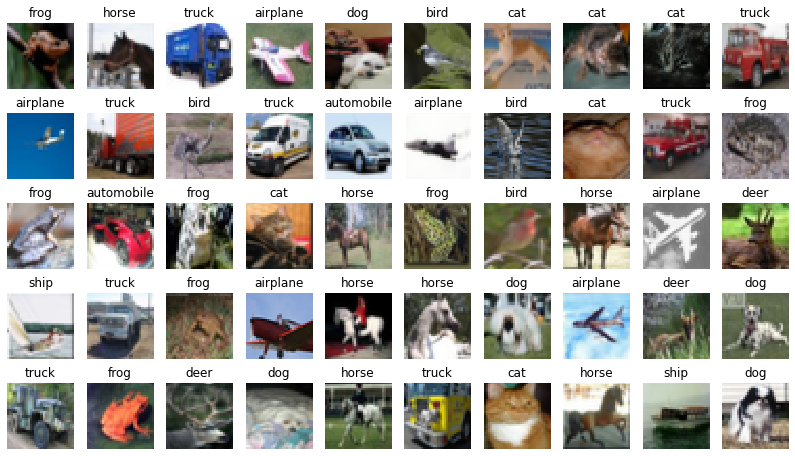

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)


X_mean = np.mean(X_train, axis = 0)
X_std = np.std(X_train, axis = 0)

X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 33s 91ms/step - loss: 1.4473 - accuracy: 0.4952 - val_loss: 1.2444 - val_accuracy: 0.5628
Epoch 2/10
352/352 [==============================] - 31s 87ms/step - loss: 1.1553 - accuracy: 0.5987 - val_loss: 1.1183 - val_accuracy: 0.6134
Epoch 3/10
352/352 [==============================] - 32s 91ms/step - loss: 1.0318 - accuracy: 0.6460 - val_loss: 1.0620 - val_accuracy: 0.6364
Epoch 4/10
352/352 [==============================] - 31s 89ms/step - loss: 0.9505 - accuracy: 0.6763 - val_loss: 1.0360 - val_accuracy: 0.6454
Epoch 5/10
352/352 [==============================] - 31s 88ms/step - loss: 0.9035 - accuracy: 0.6892 - val_loss: 1.0200 - val_accuracy: 0.6504
Epoch 6/10
352/352 [==============================] - 31s 88ms/step - loss: 0.8566 - accuracy: 0.7098 - val_loss: 1.0263 - val_accuracy: 0.6524
Epoch 7/10
352/352 [==============================] - 31s 87ms/step - loss: 0.8222 - accuracy: 0.7192 - val_loss: 1.0295 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 3s - loss: 1.0604 - accuracy: 0.6550 - 3s/epoch - 8ms/step
accuracy: 65.50%


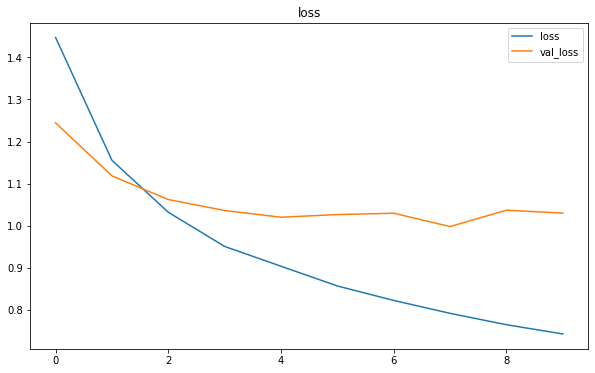

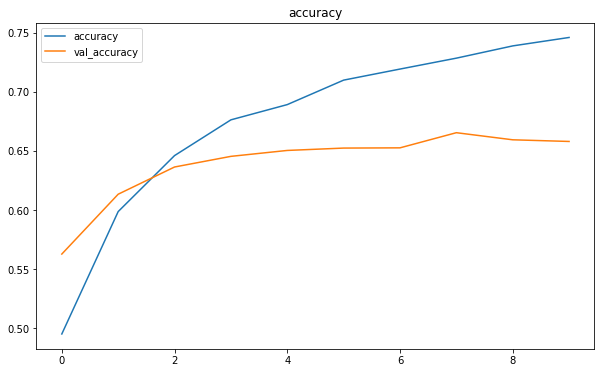

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

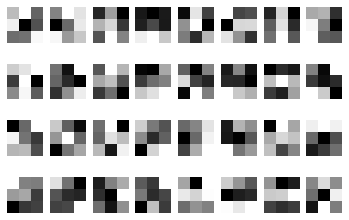

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1. The number of parameters on the two Conv2D layers is determined in this way:

  $(n \cdot m \cdot k  + 1) \cdot l$ \\
  where:
  * n: is the kernel width;
  * m: is the kernel height;
  * k: is the number of filters in the previous layer;
  * l: is the number of filters in the current layer.

  That formula is obtained by the fact that our kernel doesn't have a size of (n, m), but actually it's (n, m, k) since our input data has a size of $(a, b, m)$. Therefore, the total number of weigths would be $n\cdot m\cdot k \cdot l$, but since there is the bias parameter is $(n \cdot m \cdot k + 1) \cdot l$.

2. The two considered convolutional layers have a different number of parameters because the number of learnable parameters depends on the previous formula. In our case, on the first layer the kernel size is $(3, 3)$, the number of filters in the previous layer is $3$, the number of filters of the current one is $32$. Indeed, the number of parameters of the first layer is $(3\cdot 3\cdot 3+1)\cdot 32 = 896$. On the second layer the kernel size is $(2, 2)$, the number of filters in the previous layer is $32$, the number of filters of the current one is $16$. Indeed, the number of parameters of the second layer is $(2\cdot 2\cdot 32 + 1)\cdot 16 = 2064$

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 33s 92ms/step - loss: 1.6032 - accuracy: 0.4281 - val_loss: 1.3462 - val_accuracy: 0.5254
Epoch 2/10
352/352 [==============================] - 32s 92ms/step - loss: 1.2786 - accuracy: 0.5534 - val_loss: 1.2195 - val_accuracy: 0.5742
Epoch 3/10
352/352 [==============================] - 32s 91ms/step - loss: 1.1737 - accuracy: 0.5923 - val_loss: 1.1454 - val_accuracy: 0.5992
Epoch 4/10
352/352 [==============================] - 32s 92ms/step - loss: 1.1001 - accuracy: 0.6174 - val_loss: 1.1272 - val_accuracy: 0.6040
Epoch 5/10
352/352 [==============================] - 32s 92ms/step - loss: 1.0473 - accuracy: 0.6352 - val_loss: 1.0620 - val_accuracy: 0.6288
Epoch 6/10
352/352 [==============================] - 32s 92ms/step - loss: 1.0019 - accuracy: 0.6535 - val_loss: 1.0293 - val_accuracy: 0.6458
Epoch 7/10
352/352 [==============================] - 32s 92ms/step - loss: 0.9742 - accuracy: 0.6623 - val_loss: 1.0071 - val_accuracy:

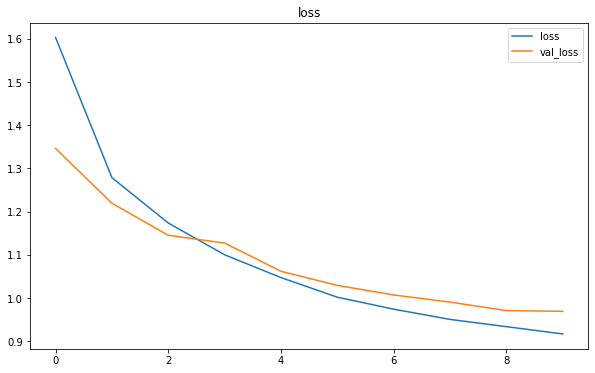

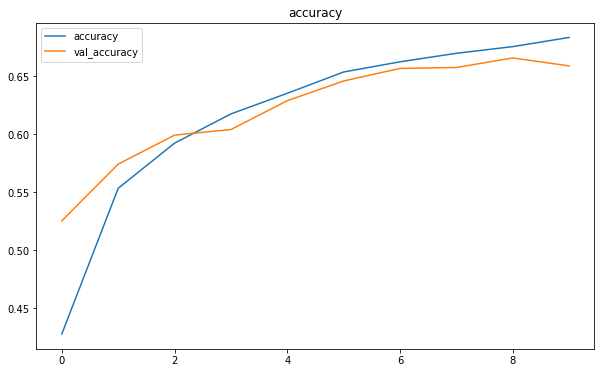

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

### [TO COMPLETE] Discussion releated to the best model
The best model that I found is the one that you can find in the next cell and it achieves an accuracy in the test set of **75.33%**.

After many tests, where at first I tried changing one parameter at a time and aftwards I combined the better parameters together, adjusted them to work better and selected the best combination, I found this model with 3 convolutional layers and average pooling as pooling layer. Each of those convolutional layers has a kernel size of $(3, 3)$, the padding is enabled and set to "same" and the filters number is $64$ for any of them. I chose those values because, while I was testing the possible combinations of values to get a better accurancy, I noticed that doing in this way I can achieve my goal. The epochs are increased from 10 to 15, while the activation function, the batch_size and the optimizer are the same as before.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 average_pooling2d_3 (Averag  (None, 16, 16, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d_4 (Averag  (None, 8, 8, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 average_pooling2d_5 (Averag  (None, 4, 4, 64)        

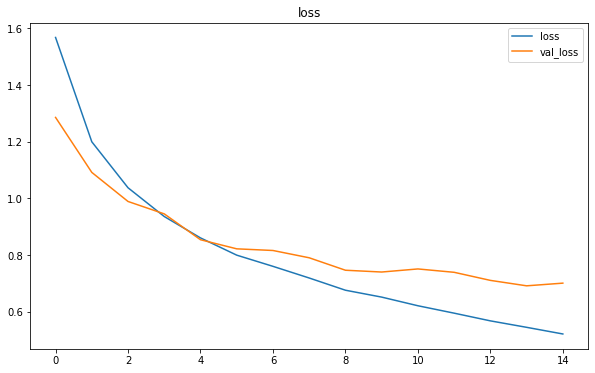

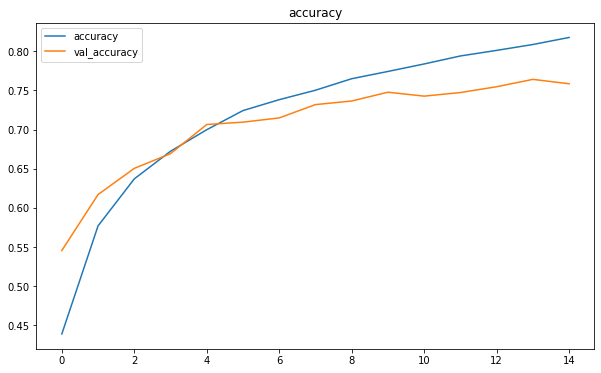

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3, 3], activation='relu', padding = "same", input_shape=[32, 32, 3]),
    keras.layers.AvgPool2D(pool_size=[2, 2]),
    keras.layers.Conv2D(filters=64, kernel_size=[3, 3], activation='relu', padding = "same"),
    keras.layers.AvgPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=[3, 3], activation='relu', padding = "same"),
    keras.layers.AvgPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

print(model.summary())
history = model.fit(X_train, y_train, epochs=15, batch_size=128,
                validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

[TO COMPLETE]

As I've already said, I didn't come up with that model immediately but I tried a lot of parameters combinations. Here below you can find some of my first tries and the models which guided me to the best one:

In [ ]:
# This is one of my first try. Here I tried adding more layers where the 
# filters number is increasing and the kernel size is drecreasing until 
# reaching (1, 1). The epochs are set to 20 and I got an accurancy of 61.72%.

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=[5,5], activation='relu', input_shape=[32, 32, 3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=[1,1], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

print(model.summary())
history = model.fit(X_train, y_train, epochs=20, batch_size=128,
                validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

In [ ]:
# From the previous model I tried to reduce the number of convolutional layers
# and add the padding set to "same", obtaing an accurancy of 70.84%.

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[5, 5], activation='relu', padding = "same", input_shape=[32, 32, 3]),
    keras.layers.MaxPool2D(pool_size=[3, 3]),
    keras.layers.Conv2D(filters=64, kernel_size=[3, 3], activation='relu', padding = "same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=[1, 1], activation='relu', padding = "same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

print(model.summary())
history = model.fit(X_train, y_train, epochs=20, batch_size=128,
                validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

In [ ]:
# Here I reduced even more the previous model setting the kernel_size of both
# convolutional layers to (3, 3) and reducing the epochs to 15. 
# I got a better accurancy than before: 71.59%.

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3, 3], activation='relu', padding = "same", input_shape=[32, 32, 3]),
    keras.layers.AvgPool2D(pool_size=[2, 2]),
    keras.layers.Conv2D(filters=64, kernel_size=[3, 3], activation='relu', padding = "same"),
    keras.layers.AvgPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

print(model.summary())
history = model.fit(X_train, y_train, epochs=15, batch_size=128,
                validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

In [ ]:
# Here I played a little bit with pool_size and batch_size. I tried changing 
# them, not together obviously, doubling the batch_size from 128 to 256 and 
# expanding the pool_size to reach a maximum of (6, 6). The following model is 
# the best one I got changing those values, with an accurancy of 68.25%, 
# pretty low compared to the previous one. For this reason, I chosed to keep
# them to (2, 2) and 128.

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3, 3], activation='relu', padding = "same", input_shape=[32, 32, 3]),
    keras.layers.MaxPool2D(pool_size=[6, 6]),
    keras.layers.Conv2D(filters=64, kernel_size=[3, 3], activation='relu', padding = "same"),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

print(model.summary())
history = model.fit(X_train, y_train, epochs=15, batch_size=256,
                validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

In [ ]:
# Starting from the good results obtained keeping the same kernel_size for all
# convolutional layers, I tried adding a new one with the doubled number of 
# filters and switching from MaxPool2D to AvgPool2D, obtaining a very good 
# accurancy of 75.06%.

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3, 3], activation='relu', padding = "same", input_shape=[32, 32, 3]),
    keras.layers.AvgPool2D(pool_size=[2, 2]),
    keras.layers.Conv2D(filters=64, kernel_size=[3, 3], activation='relu', padding = "same"),
    keras.layers.AvgPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=[3, 3], activation='relu', padding = "same"),
    keras.layers.AvgPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

print(model.summary())
history = model.fit(X_train, y_train, epochs=15, batch_size=128,
                validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

In [ ]:
# Aftweards, I tried to add strides to the convolutional layers, but 
# I deciced to avoid using it because I always got a worst accurancy (the 
# best of the worst is 71.75% obtained by the following model).

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3, 3], activation='relu', padding = "same", input_shape=[32, 32, 3]),
    keras.layers.AvgPool2D(pool_size=[2, 2]),
    keras.layers.Conv2D(filters=64, kernel_size=[3, 3], activation='relu', padding = "same"),
    keras.layers.AvgPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=[3, 3], activation='relu', strides = 2,  padding = "same"),
    keras.layers.AvgPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

print(model.summary())
history = model.fit(X_train, y_train, epochs=15, batch_size=128,
                validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

In [ ]:
# Figured out that strides weren't the way, I tried changing the activation 
# function and the kernel_size, but keeping the same for all of layers.
# The best combination I got is the following model where the activation 
# function is tanh and the kernel_size is set to (5, 5). 
# The accurancy is 70.49%, but since the model with kernel_size (3, 3) and 
# relu as activation function was better I deciced to go back to the previous 
# version.

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[5, 5], activation='tanh', padding = "same", input_shape=[32, 32, 3]),
    keras.layers.AvgPool2D(pool_size=[2, 2]),
    keras.layers.Conv2D(filters=64, kernel_size=[5, 5], activation='tanh', padding = "same"),
    keras.layers.AvgPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=[5, 5], activation='tanh', padding = "same"),
    keras.layers.AvgPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

print(model.summary())
history = model.fit(X_train, y_train, epochs=15, batch_size=128,
                validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

From this point I deciced to keep all hyperparameters, that I had found until that moment, the same and try changing the filters value for each layer. I noticed that using the same number of filters was getting a better accurancy and so I changed them as powers of 2 (i.e. $2^4, 2^5, 2^6, 2^7$) getting the best accurancy with $64$.

Notice that I have never shown a model where I changed the optimizer as well. That's because I tried changing it to SDG and AdaGrad, but the results were slightly different to the models with Adam as optimizer. 